In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from perceptron import Perceptron
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
X = data["Length"].values
Y = data["Diameter"].values

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
loss_trains = []
losss = []
η1s = []
η2s = []
for η1 in np.arange(0.0001, 0.001, 0.0002):
    for η2 in np.arange(.01, .1, .02):
        p = Perceptron(η1, η2, 100)
        loss_train = p.fit(X_train, Y_train)
        loss_trains.append({'η1': η1, 'η2': η1, 'loss_train': loss_train})
        losss.append(loss_train)
        η1s.append(η1)
        η2s.append(η2)
        print(f'η1: {"{:.4f}".format(η1)}, η2: {"{:.2f}".format(η2)}, loss_train: {"{:.5f}".format(loss_train)}')

η1: 0.0001, η2: 0.01, loss_train: 0.00229
η1: 0.0001, η2: 0.03, loss_train: 0.00315
η1: 0.0001, η2: 0.05, loss_train: 0.00236
η1: 0.0001, η2: 0.07, loss_train: 0.00030
η1: 0.0001, η2: 0.09, loss_train: 0.00276
η1: 0.0003, η2: 0.01, loss_train: 0.00044
η1: 0.0003, η2: 0.03, loss_train: 0.00071
η1: 0.0003, η2: 0.05, loss_train: 0.00029
η1: 0.0003, η2: 0.07, loss_train: 0.00029
η1: 0.0003, η2: 0.09, loss_train: 0.00040
η1: 0.0005, η2: 0.01, loss_train: 0.00028
η1: 0.0005, η2: 0.03, loss_train: 0.00027
η1: 0.0005, η2: 0.05, loss_train: 0.00031
η1: 0.0005, η2: 0.07, loss_train: 0.00029
η1: 0.0005, η2: 0.09, loss_train: 0.00027
η1: 0.0007, η2: 0.01, loss_train: 0.00026
η1: 0.0007, η2: 0.03, loss_train: 0.00026
η1: 0.0007, η2: 0.05, loss_train: 0.00026
η1: 0.0007, η2: 0.07, loss_train: 0.00027
η1: 0.0007, η2: 0.09, loss_train: 0.00027
η1: 0.0009, η2: 0.01, loss_train: 0.00027
η1: 0.0009, η2: 0.03, loss_train: 0.00026
η1: 0.0009, η2: 0.05, loss_train: 0.00026
η1: 0.0009, η2: 0.07, loss_train: 

In [15]:
i = np.argmin(losss)
η1 = η1s[i]
η2 = η2s[i]

In [20]:
p = Perceptron(η1, η2, 100)
loss_train = p.fit(X_train, Y_train)
Y_pred_train = p.predict(X_train)
print('loss_train:', loss_train)

KeyboardInterrupt: 

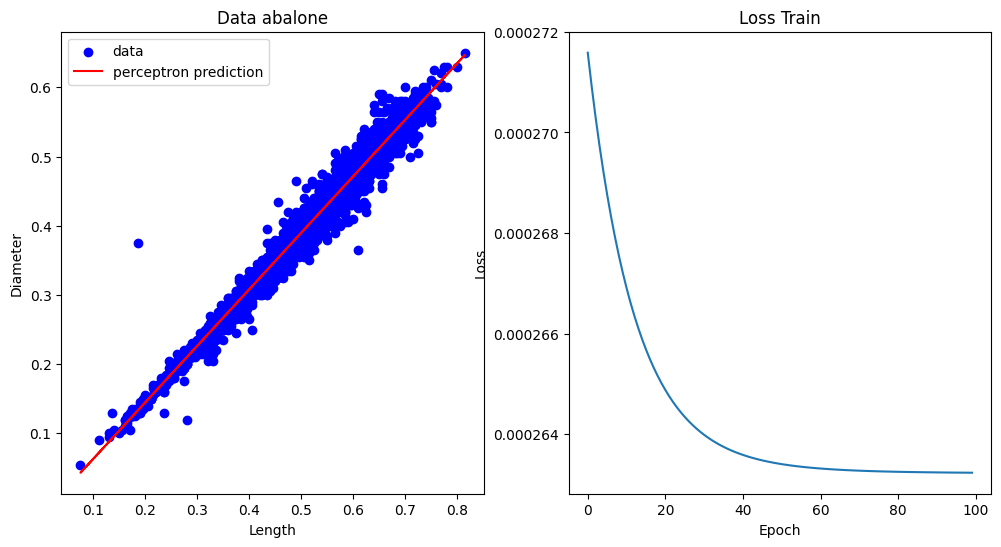

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.scatter(X_train, Y_train, c='blue')
ax1.plot(X_train, Y_pred_train, c='red')
ax1.set_title("Data abalone")
ax1.set_xlabel("Length")
ax1.set_ylabel("Diameter")
ax1.legend(['data','perceptron prediction'])

# Show Loss
ax2.plot(p.losses_train)
ax2.set_title("Loss Train")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")


plt.show()